In [1]:
# importing required modules for the task1 

import datetime
import missingno as mn
import numpy as np
import pandas as pd
import seaborn as sns

### 1.1  Dataset loading and cleaning - Transaction

In [2]:
# reading excel file (Transaction data) and showing first 5 rows to have a glance on data

df = pd.read_excel('Data/QVI_transaction_data.xlsx')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
# Checking the size of the dataset

df.shape

(264836, 8)

In [4]:
''' checking information of the dataset that contains 
the number of columns, column labels, column data types, etc. '''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**We can see that column DATE is not in right format, so calling datetime module to change the datatype of DATE column into dates**

In [5]:
# changing DATE column datatype to date, as it is USA date so the format of the date should be yyyy-mm-dd

df['DATE'] = pd.to_datetime(df['DATE'],errors='coerce',unit='d',origin='1900-01-01')

In [6]:
# showing first 5 rows to check the changed format of DATE column

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# checking if the dataset has any missing value

df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
# checking each column unique values for any inconsistant data

df['DATE'].value_counts()

2018-12-26    939
2018-12-25    917
2018-12-24    915
2018-12-21    906
2018-12-20    862
             ... 
2018-12-14    664
2019-06-26    662
2019-06-15    659
2018-10-20    658
2018-11-27    648
Name: DATE, Length: 364, dtype: int64

In [9]:
df['STORE_NBR'].value_counts()

226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
31        2
206       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64

In [10]:
df['LYLTY_CARD_NBR'].value_counts()

172032    18
162039    18
13138     17
230078    17
128178    17
          ..
20408      1
6194       1
14263      1
16310      1
2049       1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [11]:
df['TXN_ID'].value_counts()

102237    3
228741    3
108462    3
230356    3
222775    3
         ..
109471    1
107422    1
113565    1
111516    1
2049      1
Name: TXN_ID, Length: 263127, dtype: int64

In [12]:
df['PROD_NBR'].value_counts()

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64

In [13]:
df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

**After checking on google, Woolworths Medium Salsa is a bottled salsa, rest are just different flavoured chips. That's why we have to remove salsa from the dataset**

In [14]:
updated_df= df[df['PROD_NAME'] != 'Woolworths Medium Salsa 300g']
updated_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
updated_df['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [16]:
updated_df['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [17]:
updated_df['TOT_SALES'].value_counts()

9.2      22821
7.4      22513
6.0      20798
7.6      20212
8.8      19900
         ...  
9.3          3
6.9          3
11.2         2
650.0        2
12.4         2
Name: TOT_SALES, Length: 112, dtype: int64

### 1.2 Checking outliers and removing them from dataset

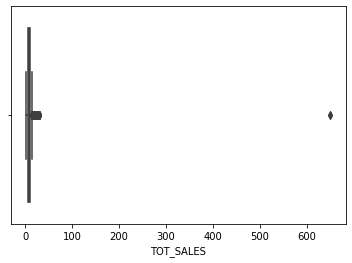

In [18]:
sns.boxplot(updated_df.TOT_SALES)

**There is an outlier stands above 600 in total sales**

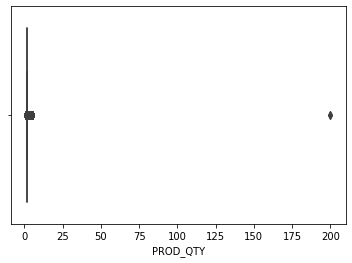

In [19]:
sns.boxplot(updated_df.PROD_QTY)

**There is also an outlier in product quantity that stands no. 200**

In [20]:
# rechecking outlier in dataset

updated_df[updated_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**we can see that product quantity and total sales outliers stands in same row, so we'll create a new dataframe without the outliers**

In [21]:
trans_df = updated_df[updated_df['PROD_QTY'] != 200]
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [22]:
trans_df['PROD_QTY'].value_counts()

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

In [23]:
trans_df['TOT_SALES'].value_counts()

9.2     22821
7.4     22513
6.0     20798
7.6     20212
8.8     19900
        ...  
9.3         3
15.5        3
6.9         3
11.2        2
12.4        2
Name: TOT_SALES, Length: 111, dtype: int64

### 1.3 Adding columns

In [24]:
trans_df['YEAR'] = pd.DatetimeIndex(trans_df['DATE']).year
trans_df['MONTH'] = pd.DatetimeIndex(trans_df['DATE']).month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Brand Column
trans_df['BRAND'] = trans_df['PROD_NAME'].apply(lambda x : x.strip().split()[0])
trans_df['BRAND'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

**we can see there is inconsistency in the brand names, for example, (Doritos and Dorito),(Infuzions and Infzns) and more**

In [26]:
brands = {'Dorito':'Doritos','Infzns':'Infuzions','Snbts':'Sunbites','Grain':'Grain Wave',
          'Red':'RRD','Smith':'Smiths','GrnWves':'Grain Wave','ww':'Woolworths','NCC':'Natural'}

trans_df['BRAND'] = trans_df['BRAND'].replace(brands)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
trans_df['BRAND'].value_counts()

Kettle        41288
Smiths        31823
Doritos       28145
Pringles      25102
RRD           17779
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Grain Wave     7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Woolworths     4437
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND, dtype: int64

In [28]:
# To extract packet size

def get_size(packet):
    size=[]
    for item in packet:
        if item.isdigit():
            size.append(item)
    return int("".join(size))


In [29]:
trans_df['PACKET_SIZE'] = trans_df['PROD_NAME'].apply(lambda a : get_size(a))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,BRAND,PACKET_SIZE
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,Natural,175
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,CCs,175
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,Smiths,170
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,Smiths,175
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,Kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3,Kettle,175
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8,Tostitos,175
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11,Doritos,170
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12,Doritos,150


In [31]:
# saving updated new transaction dataset in csv format

trans_df.to_csv('Data/QVI_transaction_data_updated.csv')

### 2.1 Loading and cleaning dataset - Purchase behaviour

In [32]:
df_pur = pd.read_csv('Data/QVI_purchase_behaviour.csv')
df_pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [33]:
df_pur.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [34]:
df_pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
df_pur['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [36]:
df_pur['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

### 3. Merging Datasets into one dataframe

In [37]:
pur_trans = trans_df.merge(df_pur, on='LYLTY_CARD_NBR')
pur_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,BRAND,PACKET_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018,11,WW,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-11,1,1307,347,54,CCs Original 175g,1,2.1,2019,3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,Smiths,170,MIDAGE SINGLES/COUPLES,Budget


In [38]:
pur_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   YEAR              264834 non-null  int64         
 9   MONTH             264834 non-null  int64         
 10  BRAND             264834 non-null  object        
 11  PACKET_SIZE       264834 non-null  int64         
 12  LIFESTAGE         264834 non-null  object        
 13  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: d

In [39]:
pur_trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,YEAR,MONTH,PACKET_SIZE
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,2018.500687,6.535943,182.425512
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,0.500000,3.448682,64.325148
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018.000000,1.000000,70.000000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,2018.000000,4.000000,150.000000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,2019.000000,7.000000,170.000000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,2019.000000,10.000000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,2019.000000,12.000000,380.000000


In [40]:
# saving merged file as csv file

pur_trans.to_csv('Data/Merged_dataset_QVI_customer.csv')